In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [11]:
def sweetness_calc(row):
    """
    Calculates an overall sweetness score using several attributes for a wine. The calculations attempt to use residual sugar as a starting point and
    then modifying results based on alcohol percentage and pH. 
 
    Args:
        row (pd.DataFrame): The row for a wine.
 
    Returns:
        sweetness (int) : The sweetness of the wine rated 1 to 5.
    """
    if row["type"] == "red":
        acid_penalty = row["pH"] / 3.4
    else: 
        acid_penalty = row["pH"] / 3.3

    # This essentially creates an interaction term for residual sugar and the acid in relation to how far off the baseline it is
    sweetness = (row["residual sugar"] * acid_penalty) + 20*math.log(10/row["alcohol"])

    return sweetness

def sweetness_assign(row):
    """
    Assigns the sweetness score based off of the sweetness column.

    Args:
        row (pd.Series) : The row from which the sweetness column is being used.

    Returns:
        A sweetness score (int) that represents how sweet a wine is based off of the calculation. 
    """
    if row["sweetness"] < 0:
        return 0
    elif 5 > row["sweetness"] >= 0:
        return 1 
    elif 10 > row["sweetness"] >= 5:
        return 2 
    elif 18 > row["sweetness"] >= 10:
        return 3
    else:
        return 4
    

def show_dist(attribute, bins_num=50):
    plt.hist(wine[attribute], bins=bins_num)
    plt.show()

In [12]:
wine  = pd.read_csv("wine-quality-white-and-red.csv")
red_wine = wine[wine["type"] == "red"]
white_wine = wine[wine["type"] == "white"]

I think it is important for us to also consider simply adhering to the numbers we found via our research, and building our features that way. We can ask the instructors when we get there later :D.

Info:
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   type                  6497 non-null   object
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64

In [13]:
wine["sweetness"] = wine.apply(sweetness_calc, axis=1)
wine["sweetness_level"] = wine.apply(sweetness_assign, axis=1)

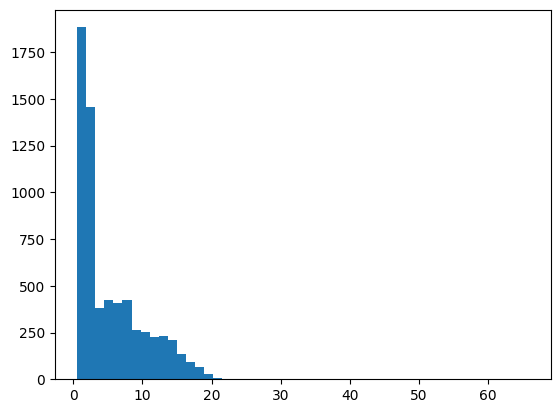

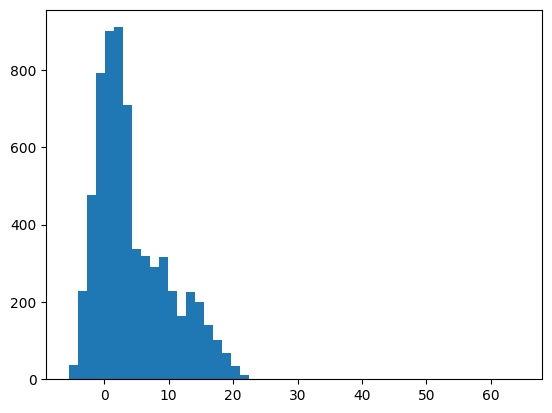

In [14]:
show_dist("residual sugar")
show_dist("sweetness")

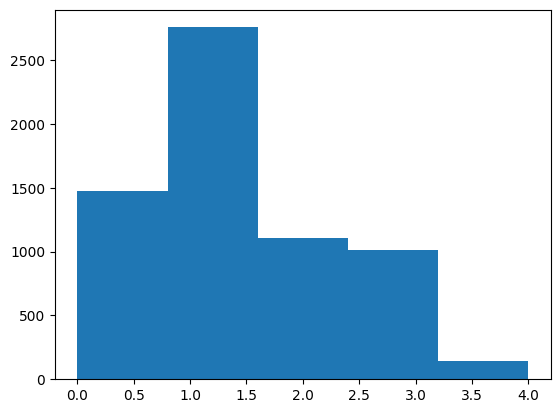

In [15]:
show_dist("sweetness_level", bins_num=5)

In [26]:
def assign_quant (dataset, col):
    quants =  [np.quantile(dataset[col], i/10) for i in range(2,10,2)]
    return quants[0],quants[1],quants[2],quants[3]


red_pH_quantiles_2,red_pH_quantiles_4,red_pH_quantiles_6,red_pH_quantiles_8 = assign_quant(red_wine, "pH")
print(red_pH_quantiles_2,red_pH_quantiles_4,red_pH_quantiles_6,red_pH_quantiles_8)
white_pH_quantiles_2,white_pH_quantiles_4,white_pH_quantiles_6,white_pH_quantiles_8 = assign_quant(white_wine, "pH")
print(white_pH_quantiles_2,white_pH_quantiles_4,white_pH_quantiles_6,white_pH_quantiles_8)

3.18 3.28 3.35 3.424000000000001
3.06 3.14 3.22 3.31


In [29]:


def acid_assign(row):
    """
    Classifies wine into 5 levels of acidity based off of the digits 0, 1, 2, 3, 4 each correlating as follows:
    0. Very low Acidity
    1. Low Acidity
    2. Average Acidity
    3. High Acidity
    4. Very High Acidity
    The calculaation cuts off different pH values based off of quantiles in the dataset to maintain a similar distribution while taking into account 
    the color of the wine due to differing pH standards.

    Args:
        row (pd.Series) : The row from which the sweetness column is being used.

    Returns:
        An acidity score (int) that represents how acidic a wine is based off of the calculation. 
    """
    if row["type"] == "red":
        if row["pH"] < red_pH_quantiles_2:
            return 4
        elif red_pH_quantiles_4 > row["pH"] >= red_pH_quantiles_2:
            return 3
        elif red_pH_quantiles_6 > row["pH"] >= red_pH_quantiles_4:
            return 2
        elif red_pH_quantiles_8 > row["pH"] >= red_pH_quantiles_6:
            return 1
        else:
            return 0
    else:
        if row["pH"] < white_pH_quantiles_2:
            return 4
        elif white_pH_quantiles_4 > row["pH"] >= white_pH_quantiles_2:
            return 3
        elif white_pH_quantiles_6 > row["pH"] >= white_pH_quantiles_4:
            return 2
        elif white_pH_quantiles_8 > row["pH"] >= white_pH_quantiles_6:
            return 1
        else:
            return 0

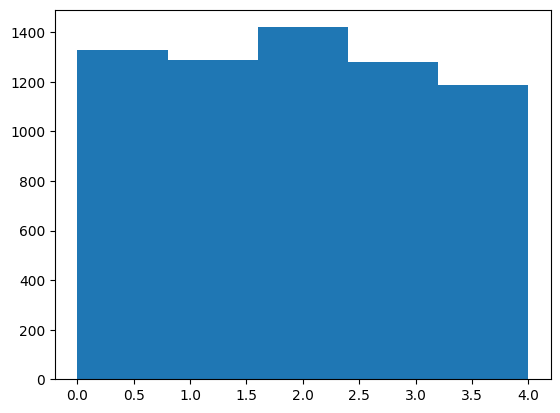

In [30]:
wine["acidity"] = wine.apply(acid_assign, axis=1)
show_dist("acidity", bins_num=5)

In [32]:
def ocean_assign(row):
    """
    According to prior research high chloride corresponds to a salty flavor in the wine, if the number of chlorides surpasses 250mg/L then we assign it a salty taste.
    The research pointed to median concentration of detectable NaCL being .30 and .31 for white and red wines for an average of .305 for wine generally. Every 1000mg/L of NaCl 
    translates to roughly 606 mg/L of chlorides thus if the amount of chlorides surpass .606 * .305, the wine will be considered to have a salty taste.

    Args:
        row (pd.Series) : The row from which the chlorides column is being used.

    Return:
        1 or 0 based on if the observation passes the threshold.
    """
    if row["chlorides"] >= 0.18483:
        return 1
    else:
        return 0

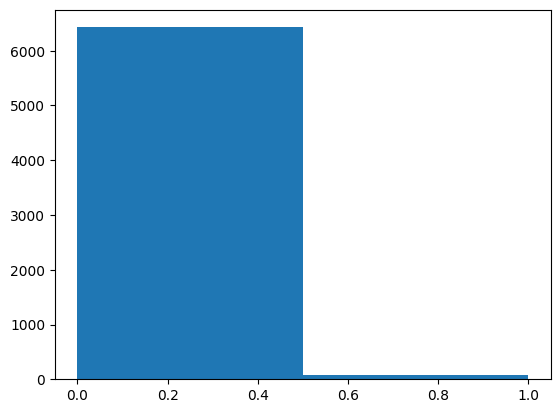

In [33]:
wine["ocean"] = wine.apply(ocean_assign, axis=1)
show_dist("ocean", bins_num=2)

In [36]:
def balsamic_assign(row):
    """
    Determines if a slight balsamic-vineger taste can be used to describe a wine. According to research if volatile acid is slightly above the recommended 1.4 (add the units),
    the wine can be considered to have a pleasant balsamic-vinegar taste.

    Args:
        row (pd.Series) : The row from which the volatile acidity column is being used.

    Returns:
        1 or 0 based on if row passes the set acidity threshold.
    """
    if row["volatile acidity"] > 1.4:
        return 1
    return 0

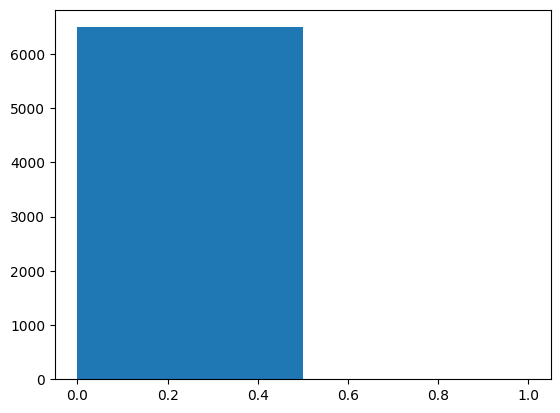

In [37]:
wine["balsamic"] = wine.apply(balsamic_assign, axis=1)
show_dist("balsamic", bins_num=2)

In [47]:
CITRIC_AVG = wine["citric acid"].mean()
CITRIC_LOW = np.quantile(wine["citric acid"], .25)
def creaminess_assign(row):
    
    if row["citric acid"] <= CITRIC_LOW:
        if np.random.random_integers(1,8) == 8:
            creaminess = row["fixed acidity"]/2 - row["citric acid"]
            creaminess = round(creaminess, 1)
            if creaminess < 0:
                return 0
            elif creaminess > 5:
                return 5
            return creaminess
    return 0


C:\Users\cobyw\AppData\Local\Temp\ipykernel_21704\1609319991.py:5: DeprecationWarning: This function is deprecated. Please call randint(1, 8 + 1) instead
  if np.random.random_integers(1,8) == 8:


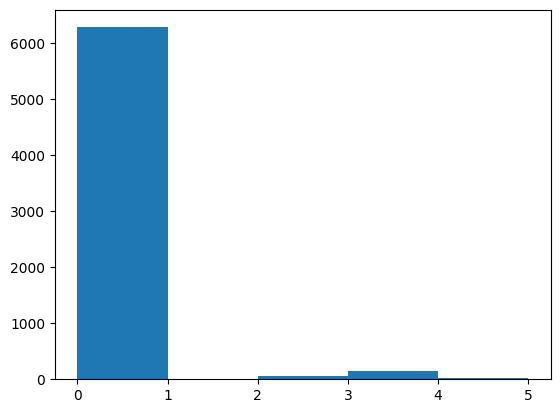

In [48]:

wine["creaminess"] = wine.apply(creaminess_assign, axis=1)
show_dist("creaminess", bins_num=5)

In [53]:


def crispness_assign(row):
    crispness = row["acidity"] - 1
    if row["citric acid"] > CITRIC_AVG:
        crispness += round(row["citric acid"]/CITRIC_AVG,1)
        if crispness > 5:
            return 5
    if row["creaminess"] > 0:
        crispness -= row["creaminess"]
        if crispness < 0:
            return 0
    return crispness


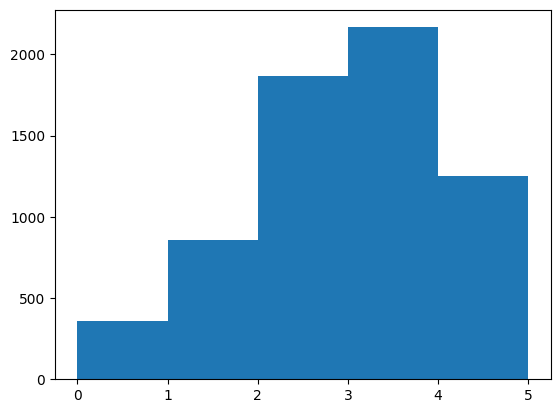

In [54]:
wine["crispness"] = wine.apply(crispness_assign, axis=1)
show_dist("crispness", bins_num=5)